In [1]:
# Importing Pandas Library for data viewing and cleaning,
import pandas as pd

In [2]:
data = pd.read_csv("files/train-data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
# co = ["Audi", "Mercedes", "Honda", "Maruti", "Tata","Hyundai", "Mahindra", "Volkswagen", "Land Rover", "Renault", "BMW",
#         "Toyota", "Kia", "Ford", "Jaguar","Chevrolet", "Suzuki"]

In [5]:
df = data.copy()

# Changing Models into Company name, this will ease the problem,
# for i in co:
#     for j in range(6019):
#         if i in df["Name"][j]:
#             df["Name"][j] = i


In [6]:
# for i in df["Name"]:
#     if i not in co:
#         df.drop(df[df["Name"]==i].index, inplace=True)
df.shape

(6019, 14)

In [7]:
# Encoding all string (object) types into integers :

df.replace({'Name': {"Audi" : 0, "Mercedes" : 1, "Honda" : 2, "Maruti" : 3, "Tata" : 4,"Hyundai" : 5, "Mahindra" : 6, "Volkswagen" : 7, "Land Rover" : 8, "Renault" : 9, "BMW" : 10,
        "Toyota" : 11, "Kia" : 12, "Ford" : 13, "Jaguar" : 14,"Chevrolet" : 15, "Suzuki" : 16}}, inplace=True)
df.replace({'Transmission':{"Automatic" : 0, "Manual" : 1}},inplace=True)
df.replace({'Fuel_Type':{"CNG" :0, "Petrol" : 1, "Diesel" : 2, "LPG" : 3, "Electric" : 4}},inplace=True)
df.replace({'Owner_Type':{"First" :0, "Second" : 1, "Third" : 2, "Fourth & Above" : 3}},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   int64  
 6   Transmission       6019 non-null   int64  
 7   Owner_Type         6019 non-null   int64  
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 658.5+ KB


In [8]:
df.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [9]:
# Removing NULL values :

df["Seats"].fillna(5.0, inplace=True)
semi =df.drop(columns=["Location","Unnamed: 0","New_Price"])
semi["Mileage"].fillna("20.0 kmpl", inplace=True)       # Average mileage = 20 Kmpl or 20 km/kg
semi["Engine"].fillna("1000 CC", inplace=True)     
semi["Power"].fillna("100 bhp", inplace=True)

print(semi.isna().sum())
print(semi.shape)

Name                 0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64
(6019, 11)


In [10]:
# Converting all the object types to float type (by removing its SI units):

l = [i[:-5] if "kmpl" in i else i[:-6] for i in semi["Mileage"]]    # mileage is in two types e.g. 20 kmpl or
l2 = [i[:-3] for i in semi["Engine"] if "CC" in i]
l3 = [i[:-4] for i in semi["Power"] if "bhp" in i]
l = [float(i) for i in l]
l2 = [int(i) for i in l2]

# (I was getting some error with "Power", so, I used this technique) :
for i in range(len(l3)):
    try:
        l3[i] = float(l3[i])
    except:
        l3[i] = 100.0

In [11]:
semi["Power_new"] = l3
semi["Mileage_new"] = l
semi["Engine_new"] = l2
semi["Year"] = 2023 -semi["Year"]
final = semi.drop(columns=["Engine","Mileage","Power", "Seats", "Name"])
final

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price,Power_new,Mileage_new,Engine_new
0,13,72000,0,1,0,1.75,58.16,26.60,998
1,8,41000,2,1,0,12.50,126.20,19.67,1582
2,12,46000,1,1,0,4.50,88.70,18.20,1199
3,11,87000,2,1,0,6.00,88.76,20.77,1248
4,10,40670,2,0,1,17.74,140.80,15.20,1968
...,...,...,...,...,...,...,...,...,...
6014,9,27365,2,1,0,4.75,74.00,28.40,1248
6015,8,100000,2,1,0,4.00,71.00,24.40,1120
6016,11,55000,2,1,1,2.90,112.00,14.00,2498
6017,10,46000,1,1,0,2.65,67.10,18.90,998


In [12]:
divKm = max(final["Kilometers_Driven"])
divEn = max(final["Engine_new"])
divMn = max(final["Mileage_new"])
divPn = max(final["Power_new"])

divKm, divEn, divMn, divPn

(6500000, 5998, 33.54, 560.0)

In [13]:
final["Kilometers_Driven"] = final["Kilometers_Driven"]/divKm
final["Engine_new"] = final["Engine_new"]/divEn
final["Mileage_new"] = final["Mileage_new"]/divMn
final["Power_new"] = final["Power_new"]/divPn
final

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price,Power_new,Mileage_new,Engine_new
0,13,0.011077,0,1,0,1.75,0.103857,0.793083,0.166389
1,8,0.006308,2,1,0,12.50,0.225357,0.586464,0.263755
2,12,0.007077,1,1,0,4.50,0.158393,0.542636,0.199900
3,11,0.013385,2,1,0,6.00,0.158500,0.619261,0.208069
4,10,0.006257,2,0,1,17.74,0.251429,0.453190,0.328109
...,...,...,...,...,...,...,...,...,...
6014,9,0.004210,2,1,0,4.75,0.132143,0.846750,0.208069
6015,8,0.015385,2,1,0,4.00,0.126786,0.727490,0.186729
6016,11,0.008462,2,1,1,2.90,0.200000,0.417412,0.416472
6017,10,0.007077,1,1,0,2.65,0.119821,0.563506,0.166389


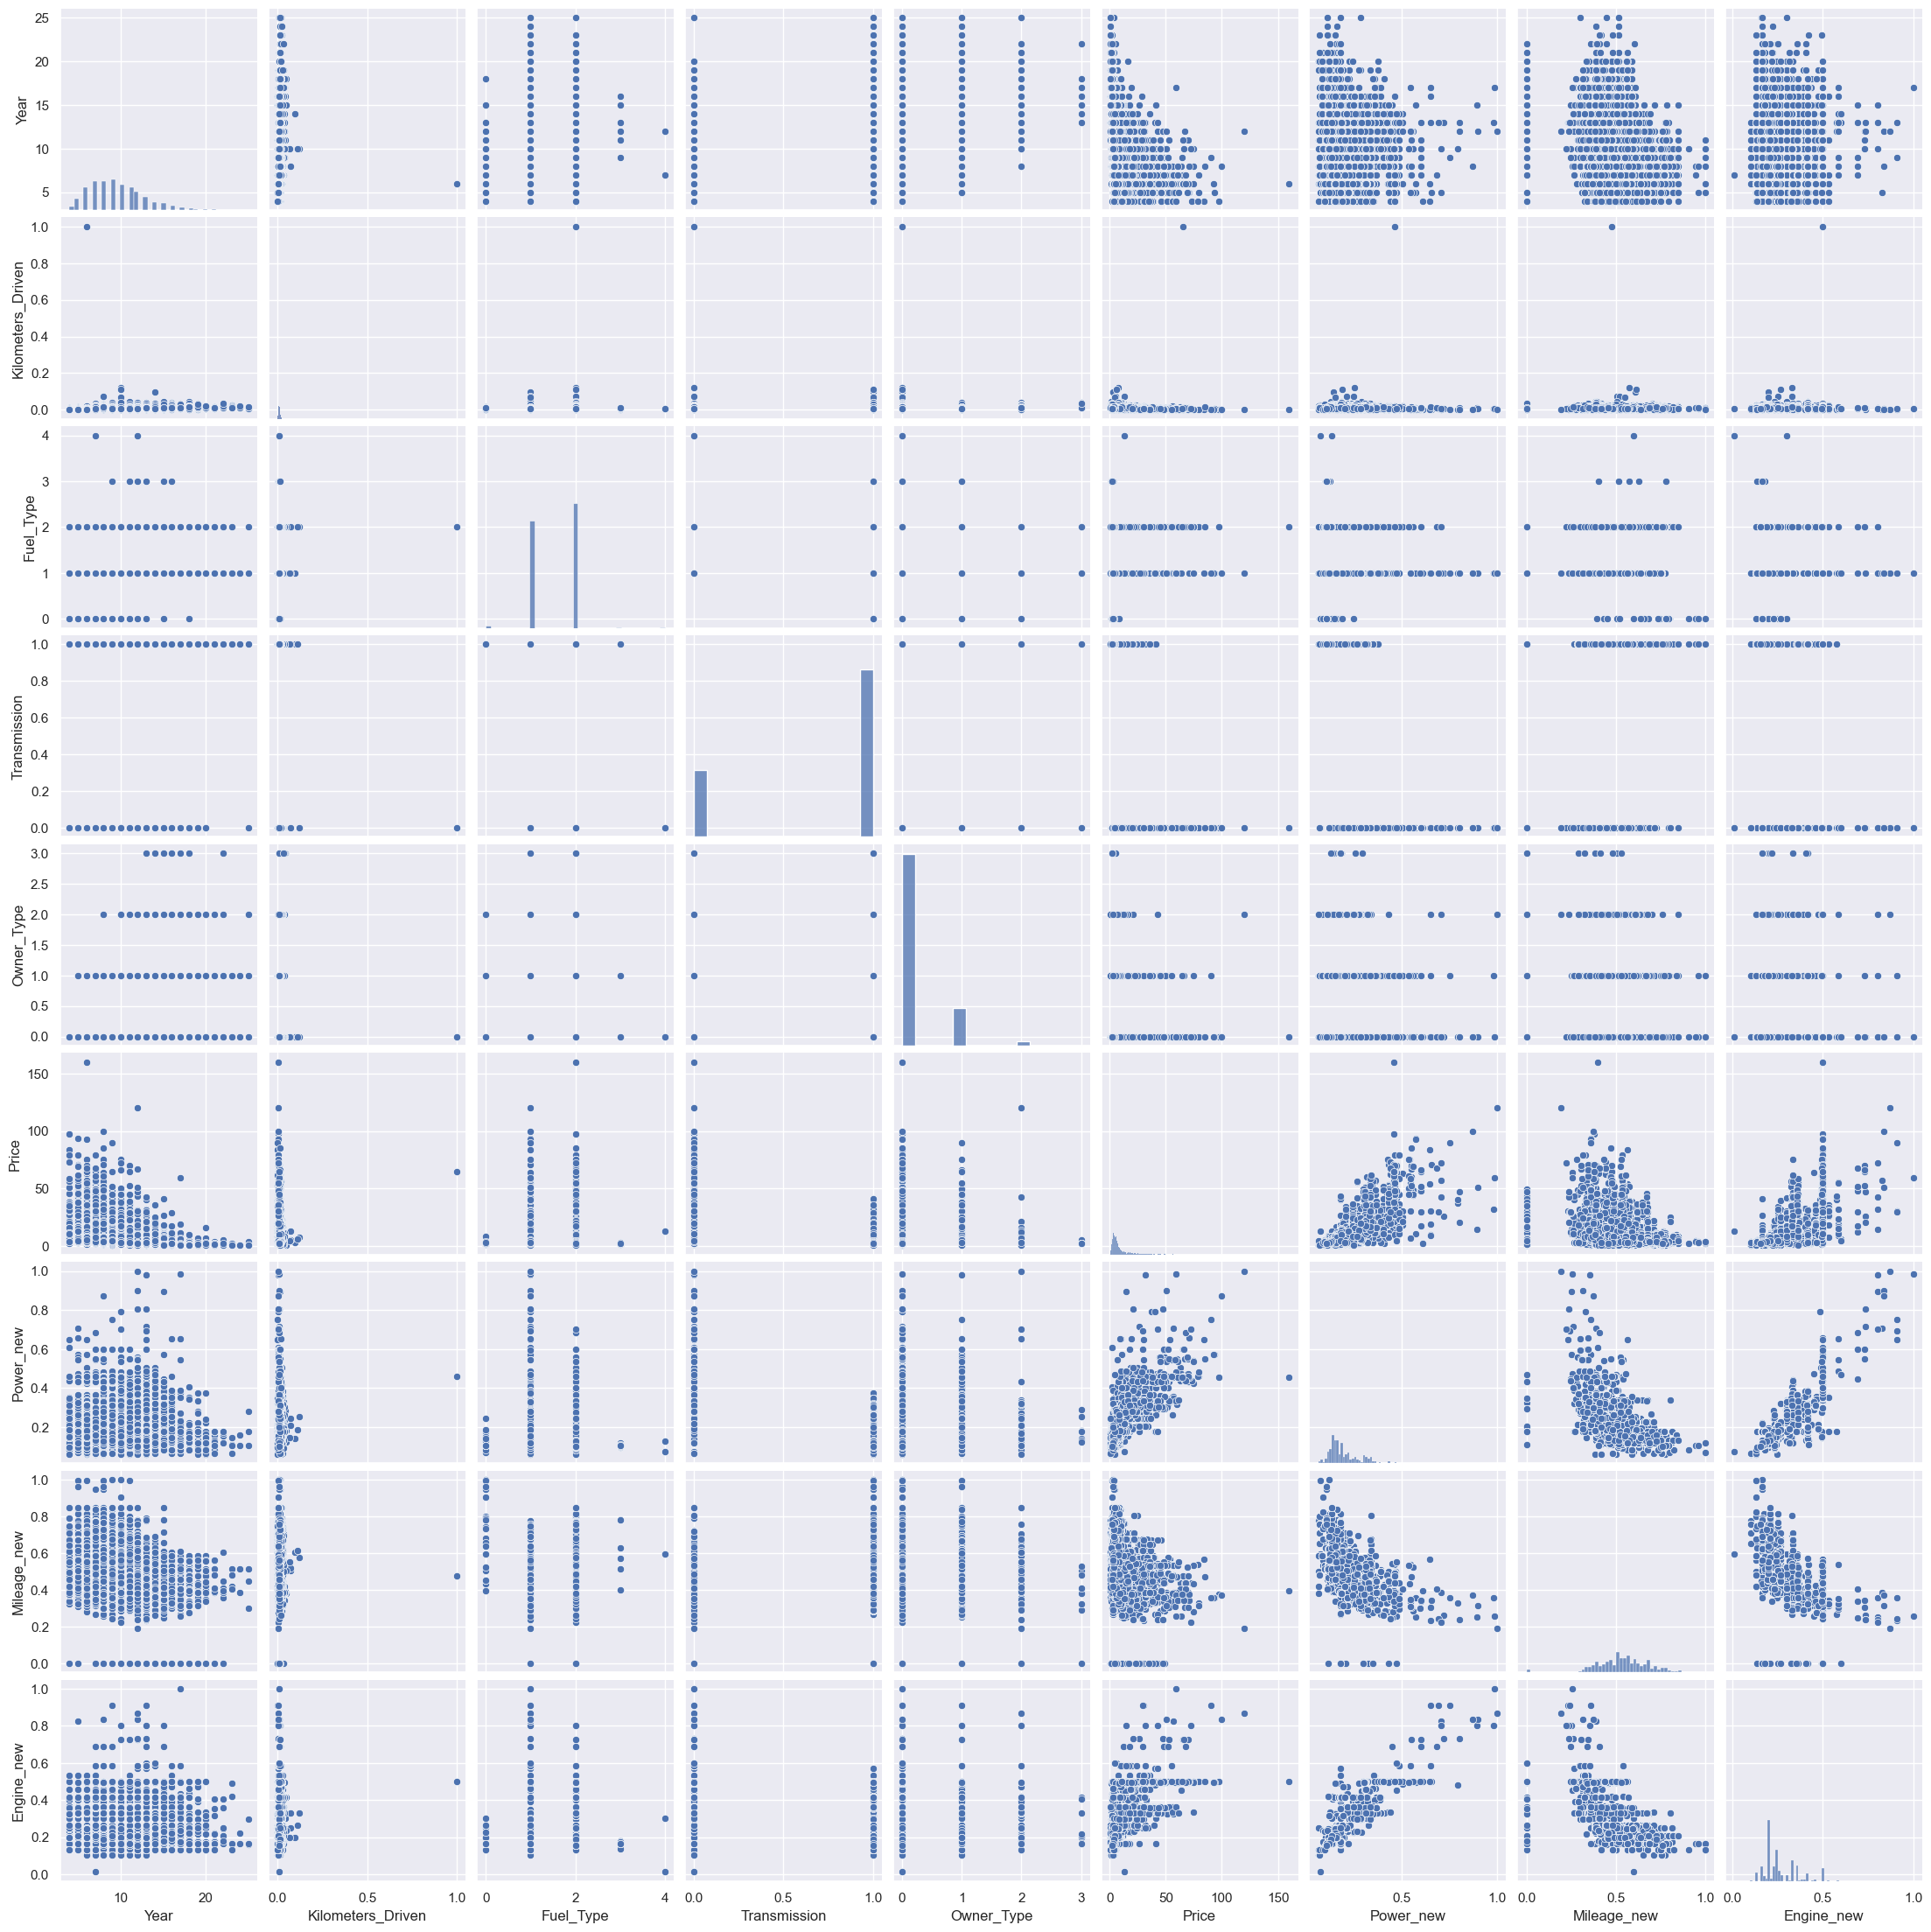

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(17,14)})
sns.pairplot(final)

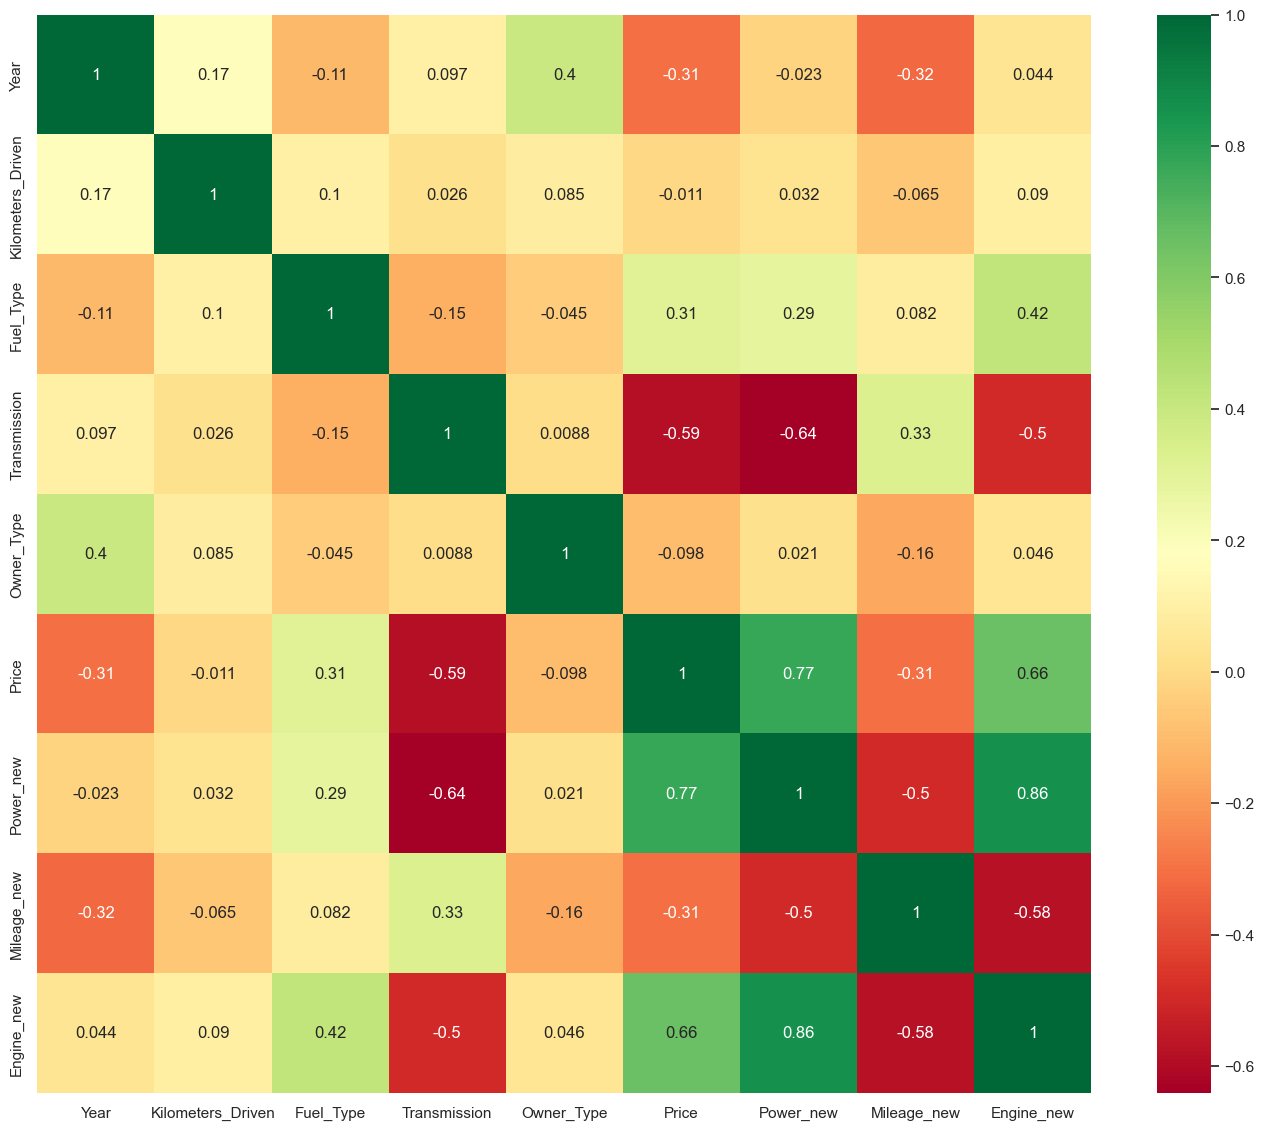

In [15]:
corrmat = final.corr()
corrmat = corrmat["Price"]
top_corr_fts = corrmat.index
sns.set(rc={'figure.figsize':(17,14)})
g=sns.heatmap(final[top_corr_fts].corr(),annot=True,cmap="RdYlGn")

In [16]:
X = final.drop(columns="Price")
y = final.Price

In [17]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [18]:
X_train = X
y_train = y
X_test = pd.read_csv("files/X_test.csv")
print(X_train.shape,y_train.shape,X_test.shape)

(6019, 8) (6019,) (1234, 8)


In [19]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score
# lmodel = LinearRegression()
# lmodel.fit(X_train,y_train)

In [20]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=12, random_state=17, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
print(f"Accuracy: {(round(sum(scores) / 10, 3)*100)}%")

Accuracy: 96.3%


In [23]:
# from joblib import dump,load
# dump(model, 'Reg.joblib')

['Reg.joblib']